(-0.42000000000000004, 4.42)


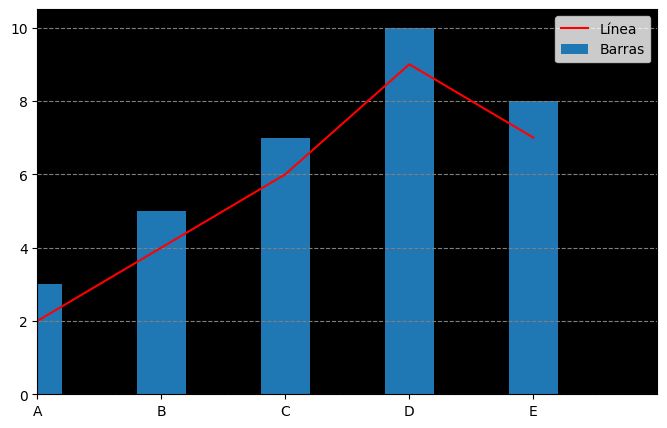

In [107]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo
categorias = ['A', 'B', 'C', 'D', 'E']
valores_barras = [3, 5, 7, 10, 8]
valores_linea = [2, 4, 6, 9, 7]

# Creamos las posiciones para las barras y el ancho de las mismas
posiciones_barras = np.arange(len(categorias))
ancho_barras = 0.4

fig, ax = plt.subplots()
fig.set_facecolor("#FFFFFF")
ax.set_facecolor("#000000")
fig.set_figwidth(8)
fig.set_figheight(5)

# Creamos la gráfica de barras
barras = ax.bar(posiciones_barras, valores_barras, ancho_barras, label='Barras')

# Creamos la gráfica de líneas
linea = ax.plot(posiciones_barras, valores_linea, color='red', marker='', label='Línea')

# Configuramos las etiquetas del eje x
ax.set_xticks(posiciones_barras)
ax.set_xticklabels(categorias)
ax.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
# Configuramos la leyenda
ax.legend()

# Mostramos la gráfica
print(ax.get_xlim())
ax.set_xlim(0, 5)
plt.show()

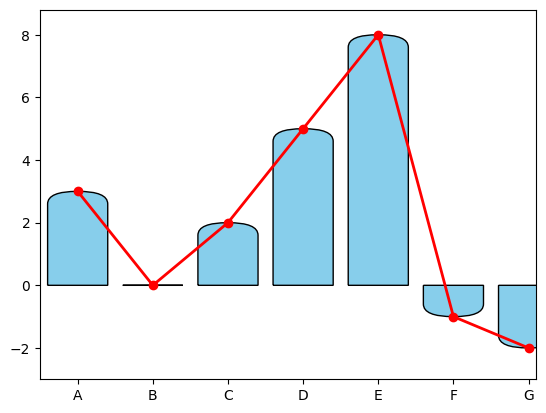

In [225]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch

# Datos de ejemplo
categorias = ['A', 'B', 'C', 'D', 'E', "F", "G"]
valores = [3, 0, 2, 5, 8, -1, -2]


def barra_redondeada(x, y, width, height, radius=0.4):
    left, right = x, x + width
    bottom, top = y, y + height
        
    path_ = []
    if height > 0:
        path_ = [
            (left, bottom),
            (right, bottom), (right, bottom), (right, bottom),
            (right, top - radius), (right, top), (right - radius, top),
            (left + radius, top), (left, top), (left, top - radius),
            (left, bottom)
        ]
    elif height < 0:
        path_ = [
            (left, bottom),
            (right, bottom), (right, bottom), (right, bottom),
            (right, top + radius), (right, top), (right - radius, top),
            (left + radius, top), (left, top), (left, top + radius),
            (left, bottom)
        ]
    else:
        path_ = [
            (left, bottom),
            (right, bottom), (right, bottom), (right, bottom),
            (right, top), (right, top), (right, top),
            (left, top), (left, top), (left, top),
            (left, bottom)
        ]
    path = Path(path_,
    [
        Path.MOVETO,
        Path.LINETO, Path.CURVE3, Path.CURVE3,
        Path.LINETO, Path.CURVE3, Path.CURVE3,
        Path.LINETO, Path.CURVE3, Path.CURVE3,
        Path.LINETO,
    ])
    return PathPatch(path, facecolor='skyblue', edgecolor='k')

fig, ax = plt.subplots()

# Genera el diagrama de barras con bordes redondeados
for i, (categoria, valor) in enumerate(zip(categorias, valores)):
    bar_patch = barra_redondeada(i, 0, 0.8, valor)
    ax.add_patch(bar_patch)

# Configura el eje x
ax.set_xticks(np.arange(len(categorias)) + 0.4)
ax.set_xticklabels(categorias)
ax.set_xlim(-0.1, len(categorias) - 0.5)


# Configura el eje y
ax.set_ylim(-3, max(valores) * 1.1)
x_line = np.arange(len(categorias)) + 0.4
y_line = valores
ax.plot(x_line, y_line, color='red', marker='o', linestyle='-', linewidth=2, markersize=6)


plt.show()


In [40]:
# Create a path for each bar with a rounded top
for rect in rects:
    x = rect.get_x()
    y = rect.get_y()
    width = rect.get_width()
    height = rect.get_height()
    radius = 0.1 * height
    path = Path([
        (x , y),
        (x , y),
        (x + width, y + radius),
        (x + width, y + height - radius),
        (x + width - radius, y + height),
        (x + radius, y + height),
        (x, y + height - radius),
        (x, y + radius),
        (x + radius, y)
    ])
    patch = PathPatch(path, facecolor='#1f77b4', edgecolor='black', linewidth=1, alpha=0.7)
    ax.add_patch(patch)
    rect.remove()

# Set axis labels and title
ax.set_xlabel('Category')
ax.set_ylabel('Value')
ax.set_title('Bar Chart with Rounded Tops')

# Display the chart
plt.show()


In [60]:
import sys
from PyQt6 import QtCore, QtGui, QtSvg
from PyQt6.QtCore import Qt
from PyQt6.QtWidgets import QWidget, QGraphicsView,QGraphicsScene, QApplication
from matplotlib.figure import Figure
from matplotlib.backends.backend_qtagg import FigureCanvasQTAgg as FigureCanvas
import numpy as np


class Circle(QWidget):
    def __init__(self):
        super(Circle, self).__init__()
        self.setAttribute(Qt.WA_TranslucentBackground)
        self.resize(500, 500)

    def paintEvent(self, event):
        p = QtGui.QPainter()
        p.begin(self)
        p.setPen(QtGui.QColor(255,0,0))
        p.drawEllipse(100, 100, 300, 300)
        p.end()


class MyView(QGraphicsView):
    def __init__(self):
        QGraphicsView.__init__(self)

        scene = QGraphicsScene(self)
        self.scene = scene

        circle = Circle()
        self.circle = circle
        scene.addWidget(circle)

        self.setScene(scene)

    def wheelEvent(self, event):
        self.setTransformationAnchor(QGraphicsView.AnchorUnderMouse)
        zoom_in = 1.15
        zoom_out = 1.0 / zoom_in
        if event.delta() > 0:
            self.scale(zoom_in, zoom_in)
        else:
            self.scale(zoom_out, zoom_out)

app = QApplication(sys.argv)
view = MyView()
view.show()
sys.exit(app.exec_())

qt.dbus.integration: Could not connect "org.freedesktop.IBus" to globalEngineChanged(QString)


AttributeError: type object 'Qt' has no attribute 'WA_TranslucentBackground'